# Compare only sparse implementations

<Figure size 1500x1000 with 0 Axes>

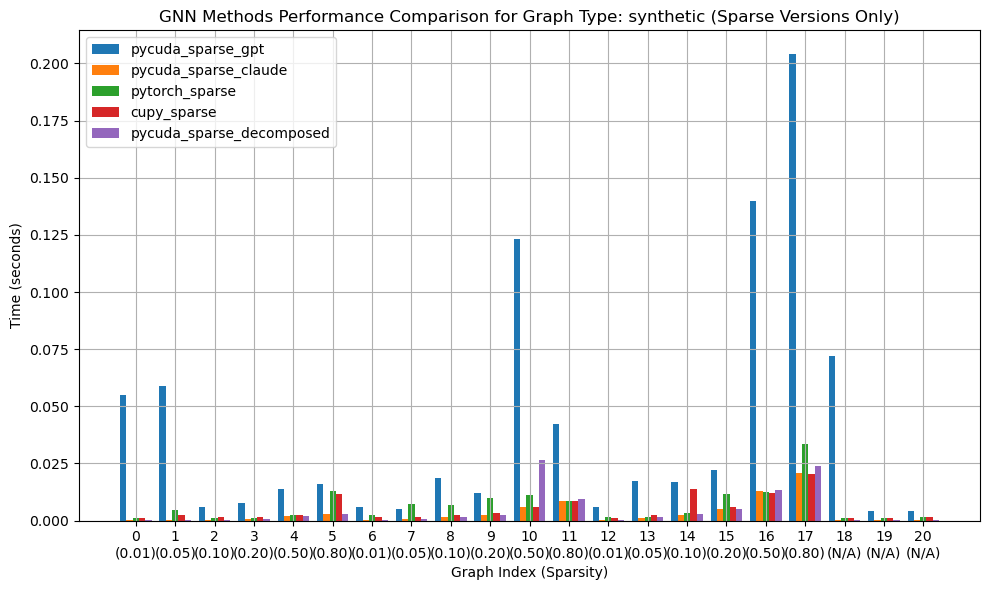

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load results
with open('gnn_results.json', 'r') as f:
    results = json.load(f)

# Extract data for plotting
target_methods = list(set(result['method'] for result in results if 'sparse' in result['method']))
graph_indices = sorted(set(result['graph_index'] for result in results))

# Extract graph properties for labeling
graph_properties = {result['graph_index']: (result['graph_name'], result['graph_type'], result.get('num_nodes'), result.get('sparsity')) for result in results}
method_times = {method: [] for method in target_methods}

for graph_index in graph_indices:
    for method in target_methods:
        times = [result['time_seconds'] for result in results if result['graph_index'] == graph_index and result['method'] == method]
        if times:
            method_times[method].append(times[0])
        else:
            method_times[method].append(np.nan)  # Use NaN for missing data

# Plot the results for each graph type separately
unique_graph_types = set(prop[1] for prop in graph_properties.values())
plt.figure(figsize=(15, 10))

for graph_type in unique_graph_types:
    plt.figure(figsize=(10, 6))
    filtered_indices = [index for index in graph_indices if graph_properties[index][1] == graph_type]
    num_graphs = len(filtered_indices)
    num_methods = len(target_methods)
    bar_width = 0.8 / num_methods  # Width of each bar

    for i, method in enumerate(target_methods):
        times = [method_times[method][graph_indices.index(index)] for index in filtered_indices]
        bar_positions = np.arange(num_graphs) + i * bar_width
        plt.bar(bar_positions, times, width=bar_width, label=method)

    # Create custom x-tick labels with graph index and sparsity
    x_tick_labels = [f'{index}\n({graph_properties[index][3]:.2f})' if graph_properties[index][3] is not None else f'{index}\n(N/A)' for index in filtered_indices]
    plt.xlabel('Graph Index (Sparsity)')
    plt.ylabel('Time (seconds)')
    plt.title(f'GNN Methods Performance Comparison for Graph Type: {graph_type} (Sparse Versions Only)')
    plt.xticks(np.arange(num_graphs) + bar_width * (num_methods - 1) / 2, x_tick_labels)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Compare all versions

<Figure size 1500x1000 with 0 Axes>

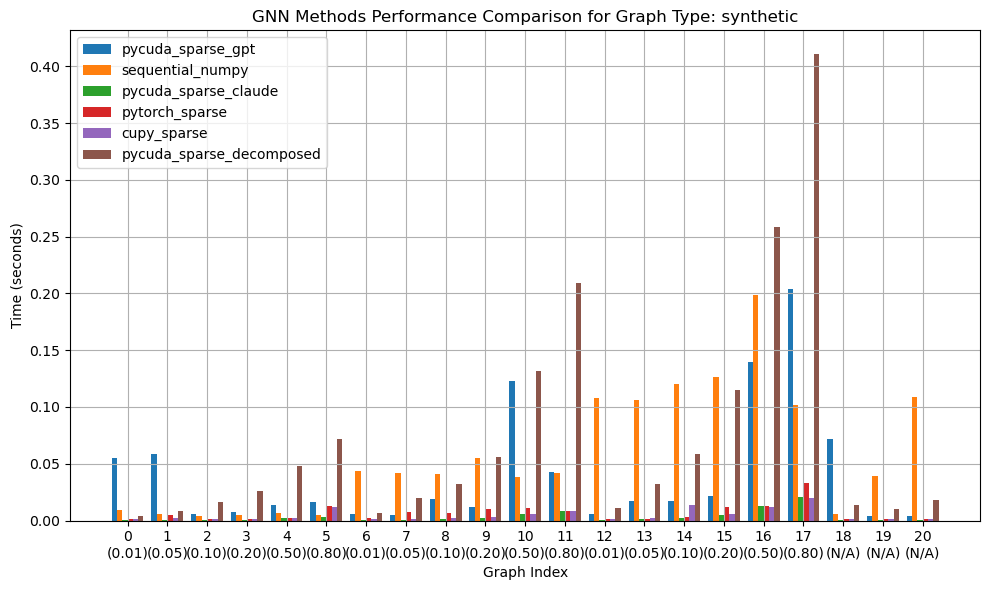

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load results
with open('gnn_results.json', 'r') as f:
    results = json.load(f)

# Extract data for plotting
target_methods = list(set(result['method'] for result in results))
graph_indices = sorted(set(result['graph_index'] for result in results))

# Extract graph properties for labeling
graph_properties = {result['graph_index']: (result['graph_name'], result['graph_type'], result.get('num_nodes'), result.get('sparsity')) for result in results}
method_times = {method: [] for method in target_methods}

for graph_index in graph_indices:
    for method in target_methods:
        times = [result['time_seconds'] for result in results if result['graph_index'] == graph_index and result['method'] == method]
        if times:
            method_times[method].append(times[0])
        else:
            method_times[method].append(np.nan)  # Use NaN for missing data

# Plot the results for each graph type separately
unique_graph_types = set(prop[1] for prop in graph_properties.values())
plt.figure(figsize=(15, 10))

for graph_type in unique_graph_types:
    plt.figure(figsize=(10, 6))
    filtered_indices = [index for index in graph_indices if graph_properties[index][1] == graph_type]
    num_graphs = len(filtered_indices)
    num_methods = len(target_methods)
    bar_width = 0.8 / num_methods  # Width of each bar

    
    for i, method in enumerate(target_methods):
        times = [method_times[method][graph_indices.index(index)] for index in filtered_indices]
        bar_positions = np.arange(num_graphs) + i * bar_width
        plt.bar(bar_positions, times, width=bar_width, label=method)

    x_tick_labels = [f'{index}\n({graph_properties[index][3]:.2f})' if graph_properties[index][3] is not None else f'{index}\n(N/A)' for index in filtered_indices]
    plt.xlabel('Graph Index')
    plt.ylabel('Time (seconds)')
    plt.title(f'GNN Methods Performance Comparison for Graph Type: {graph_type}')
    plt.xticks(np.arange(num_graphs) + bar_width * (num_methods - 1) / 2, x_tick_labels)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

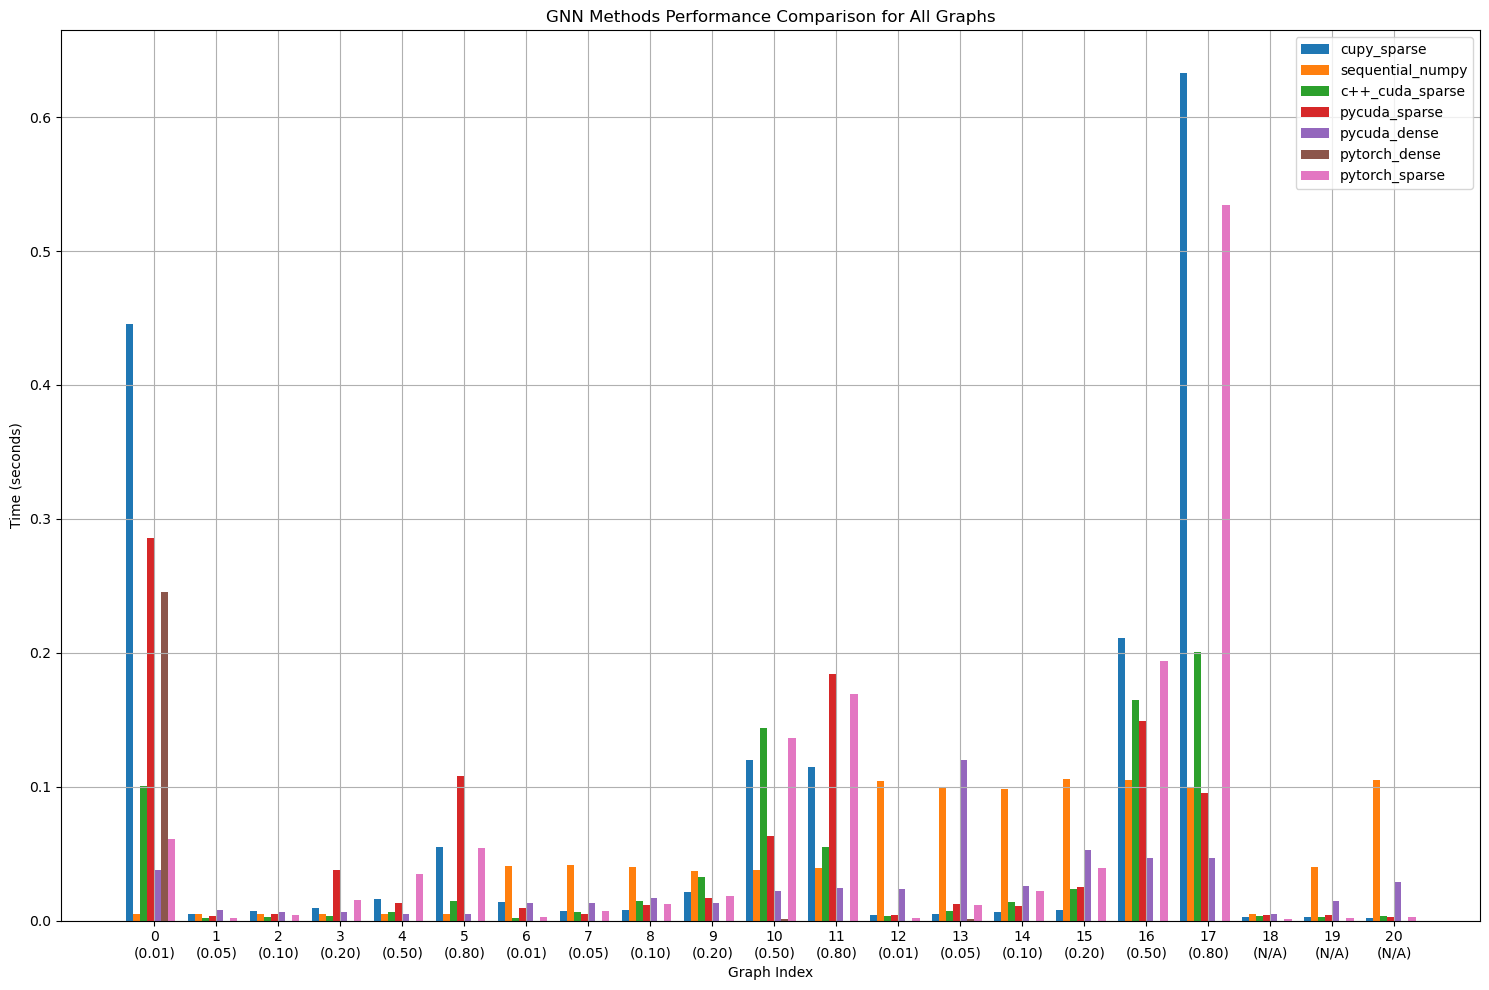

In [ ]:

# Plot the results for all graphs together
plt.figure(figsize=(15, 10))
for i, method in enumerate(target_methods):
    times = [method_times[method][graph_indices.index(index)] for index in graph_indices]
    bar_positions = np.arange(len(graph_indices)) + i * 0.8 / len(target_methods)
    plt.bar(bar_positions, times, width=0.8 / len(target_methods), label=method)

plt.xlabel('Graph Index')
plt.ylabel('Time (seconds)')
plt.title('GNN Methods Performance Comparison for All Graphs')
plt.xticks(np.arange(len(graph_indices)) + 0.4, x_tick_labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

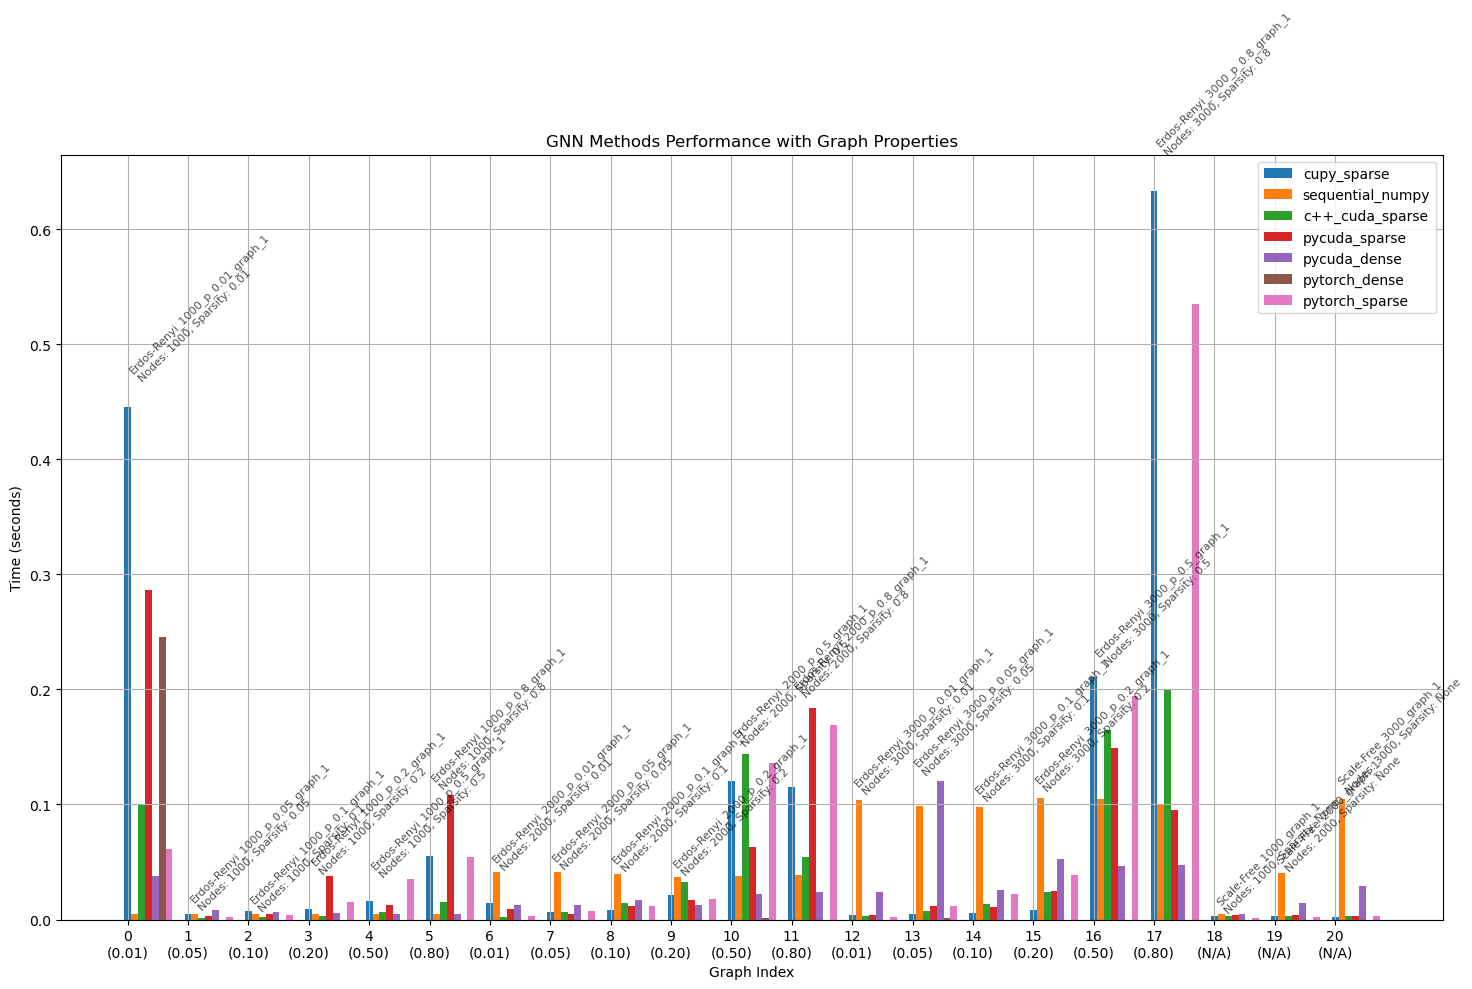

In [ ]:

# Plot the results with additional properties annotated
plt.figure(figsize=(15, 10))
for i, method in enumerate(target_methods):
    bar_positions = np.arange(len(graph_indices)) + i * 0.8 / len(target_methods)
    plt.bar(bar_positions, [method_times[method][graph_indices.index(index)] for index in graph_indices], width=0.8 / len(target_methods), label=method)

for graph_index in graph_indices:
    name, graph_type, num_nodes, sparsity = graph_properties[graph_index]
    plt.annotate(f'{name}\nNodes: {num_nodes}, Sparsity: {sparsity}', (graph_index, max([method_times[method][graph_indices.index(graph_index)] for method in target_methods if not np.isnan(method_times[method][graph_indices.index(graph_index)])]) * 1.05), rotation=45, fontsize=8, alpha=0.7)

plt.xlabel('Graph Index')
plt.ylabel('Time (seconds)')
plt.title('GNN Methods Performance with Graph Properties')
plt.xticks(np.arange(len(graph_indices)), x_tick_labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Metric tracking

# All methods

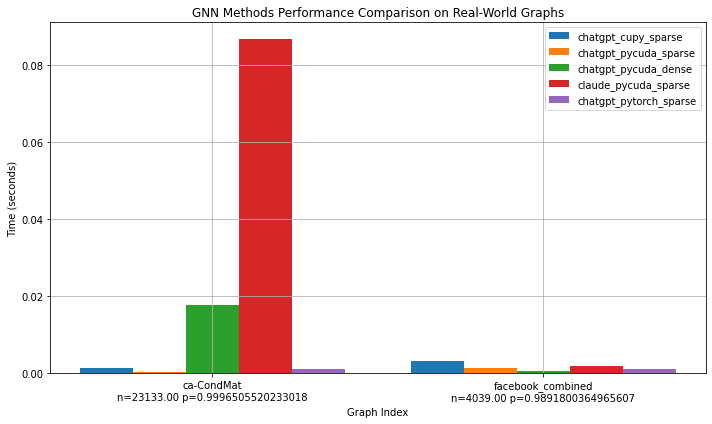

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Load results
with open('gnn_results.json', 'r') as f:
    results = json.load(f)

# Extract data for plotting
target_methods = list(results.keys())
graph_indices = sorted(map(int, set(next(iter(results.values())).keys())))

# Extract graph properties for labeling
test_result = next(iter(results.values()))
graph_properties = {int(graph_index): (data['graph_name'], data['graph_type'], data['num_nodes'], data['sparsity']) for graph_index, data in test_result.items()}
method_times = {method: [] for method in target_methods}

for method, graphs in results.items():
    for graph_index, graph_data in graphs.items():
        time = graph_data['time_seconds']
        if time:
            method_times[method].append(time)
        else:
            method_times[method].append(np.nan)  # Use NaN for


plt.figure(figsize=(10, 6))
num_graphs = len(graph_indices)
num_methods = len(target_methods)
bar_width = 0.8 / num_methods  # Width of each bar


for i, method in enumerate(target_methods):
    times = [method_times[method][index] for index in graph_indices]
    bar_positions = np.arange(num_graphs) + i * bar_width
    plt.bar(bar_positions, times, width=bar_width, label=method)

x_tick_labels = [f'{graph_properties[index][0]}\nn={graph_properties[index][2]:.2f} p={graph_properties[index][3]}' for index in filtered_indices]
plt.xlabel('Graph Index')
plt.ylabel('Time (seconds)')
plt.title(f'GNN Methods Performance Comparison on Real-World Graphs')
plt.xticks(np.arange(num_graphs) + bar_width * (num_methods - 1) / 2, x_tick_labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig(Path("plots") / "facebookVScondmat.jpg", format="jpg")
plt.show()

C:\Users\golpo\AppData\Local\Temp\ipykernel_55128\2960181030.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots(figsize=(10, 6))


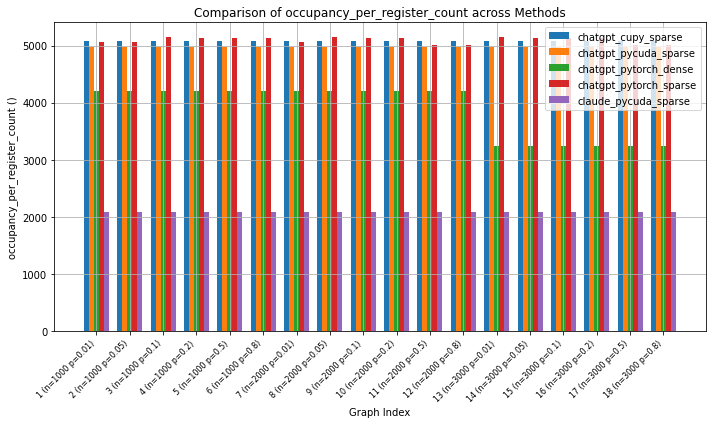

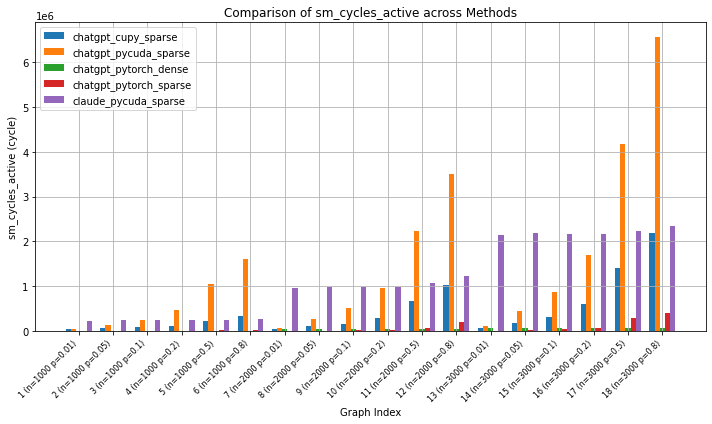

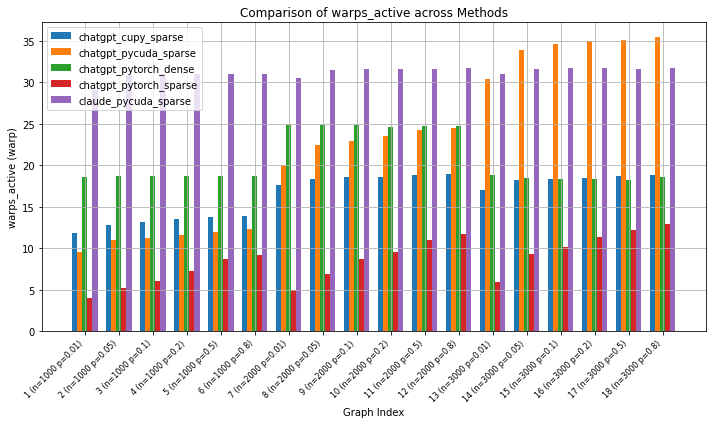

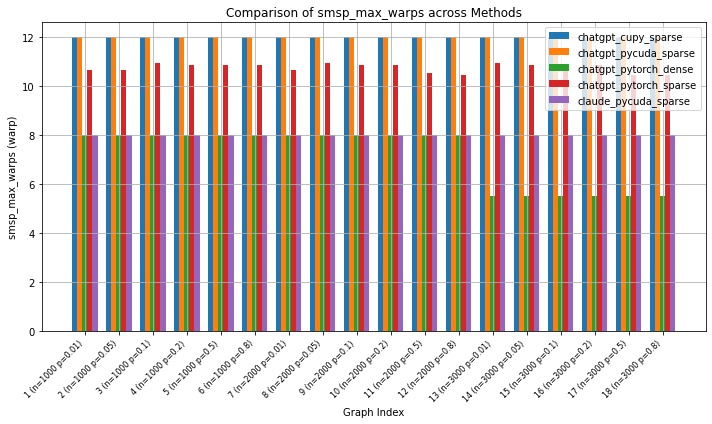

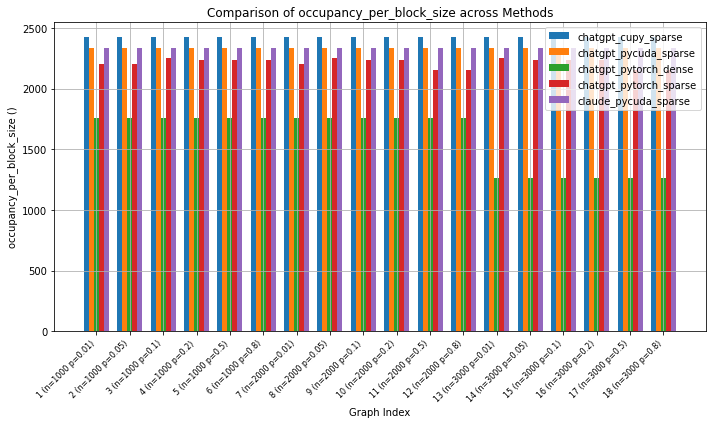

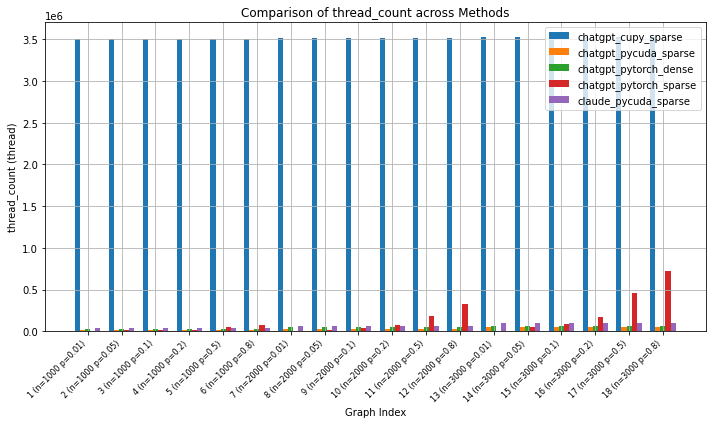

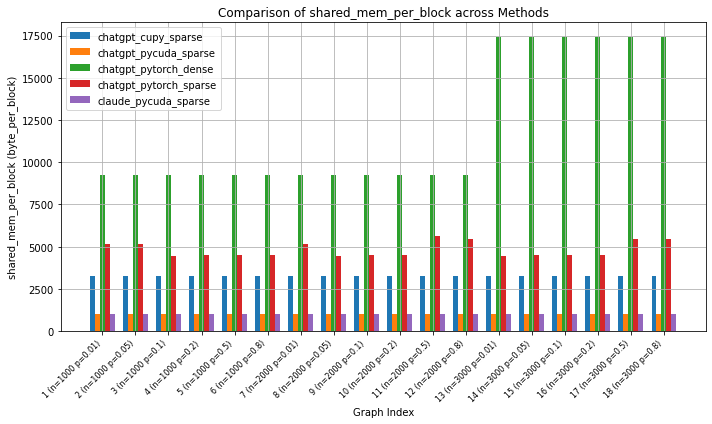

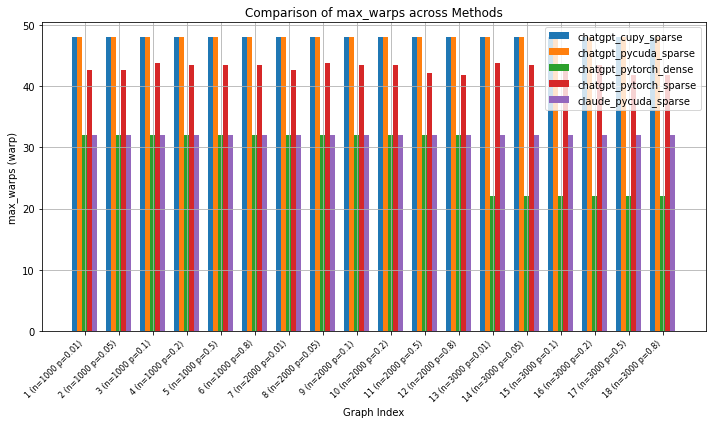

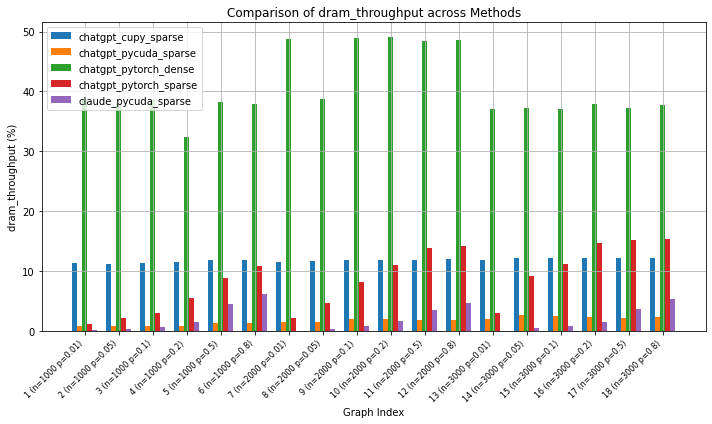

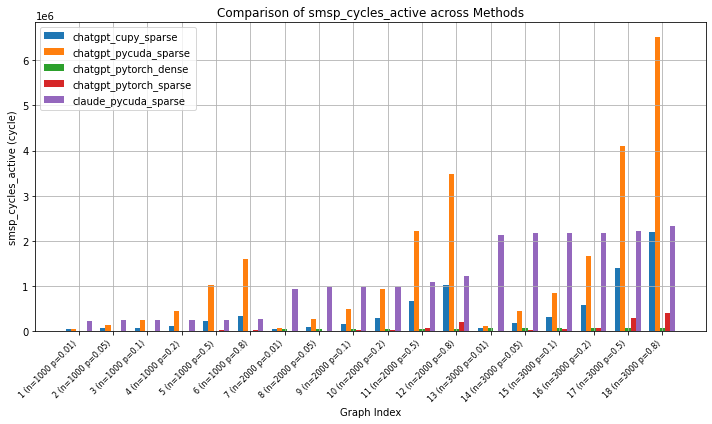

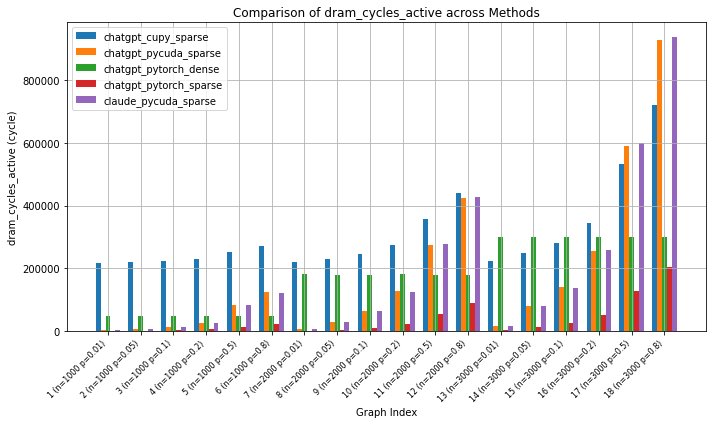

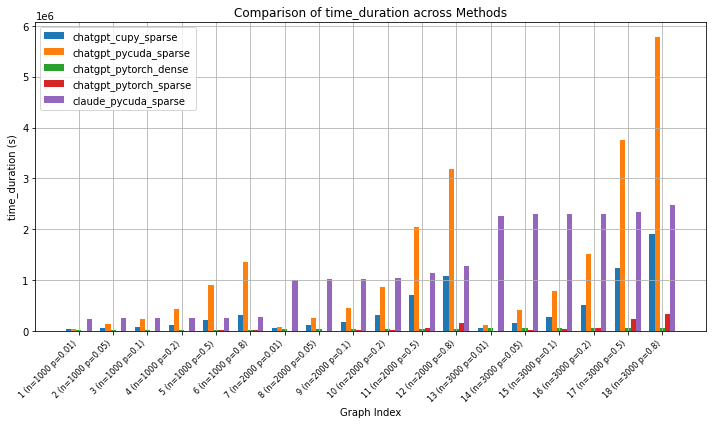

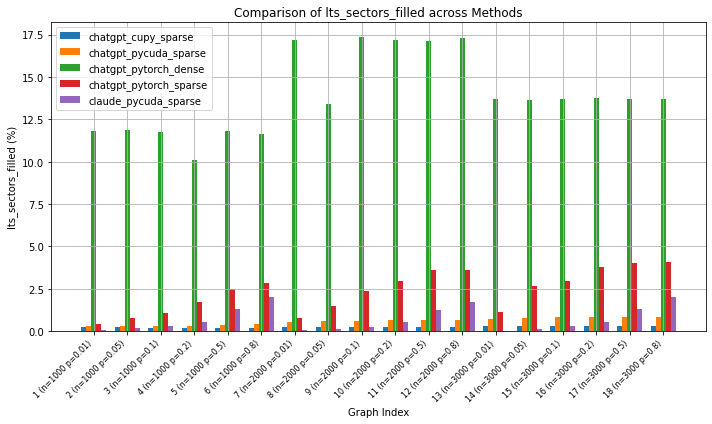

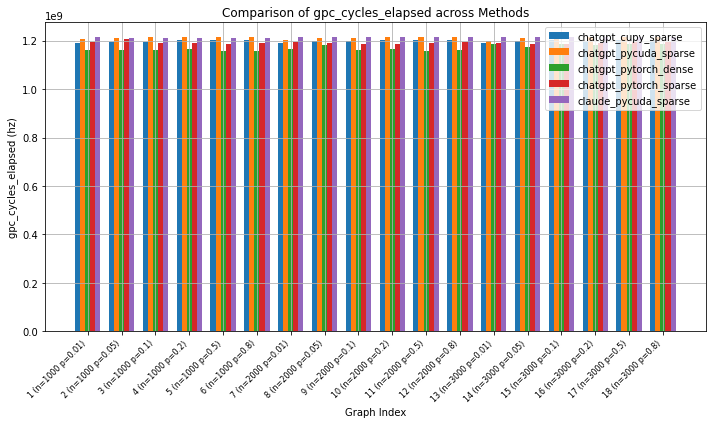

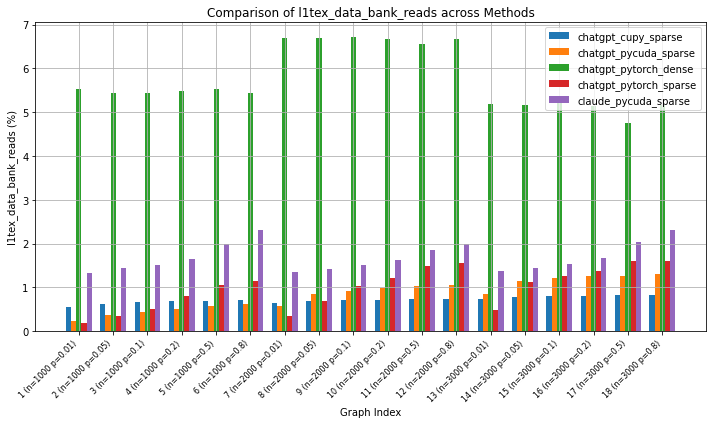

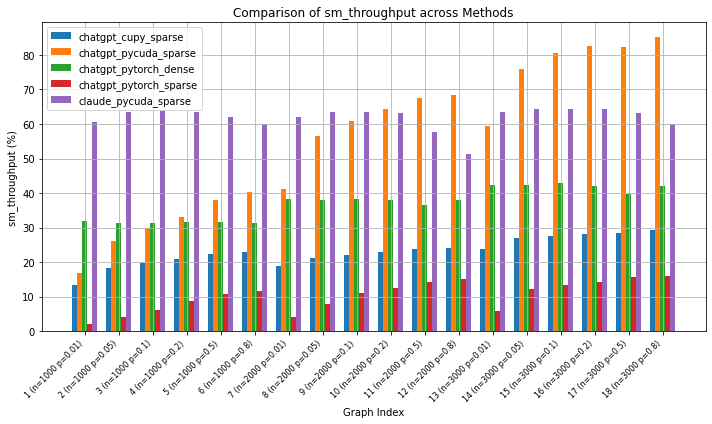

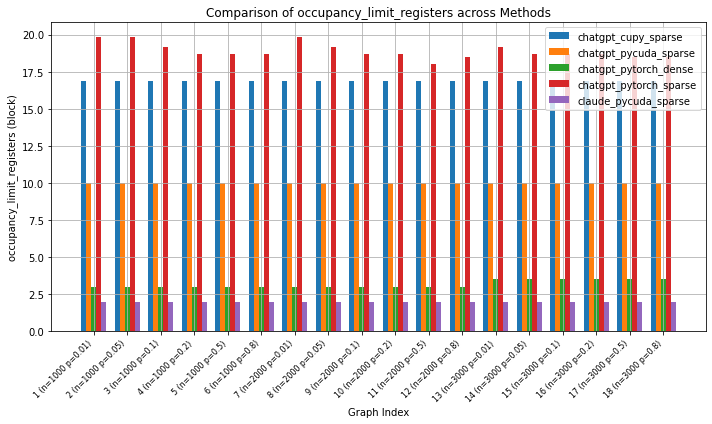

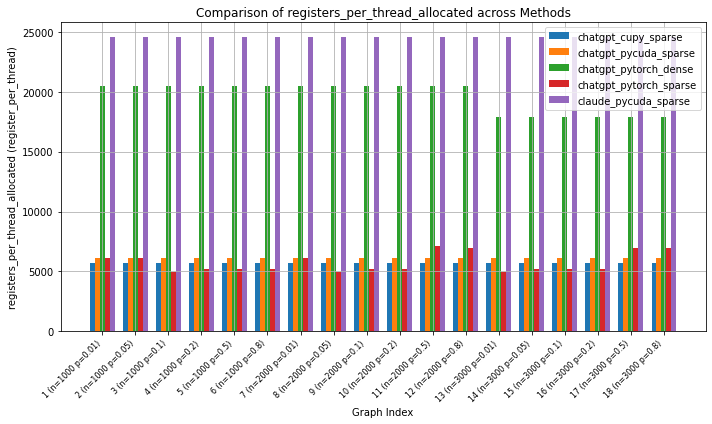

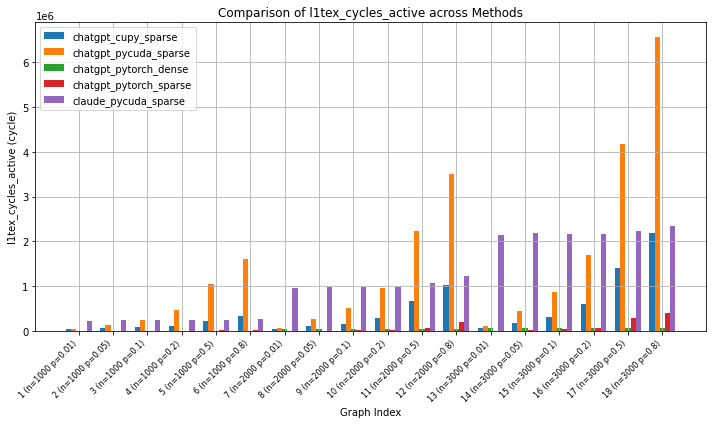

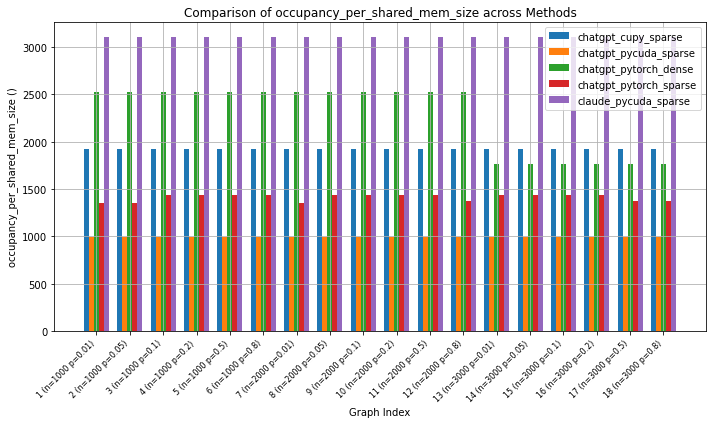

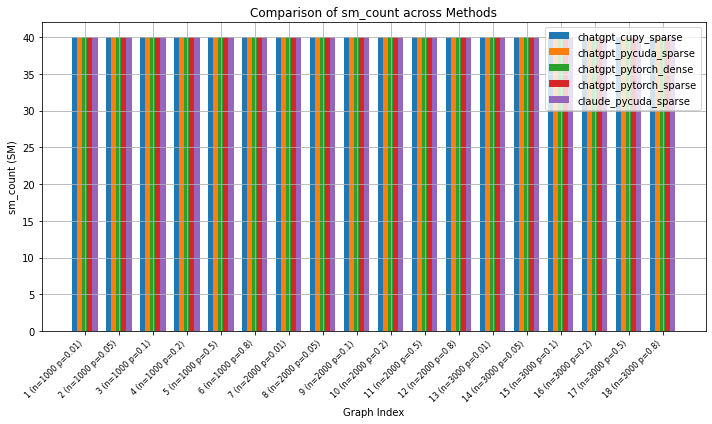

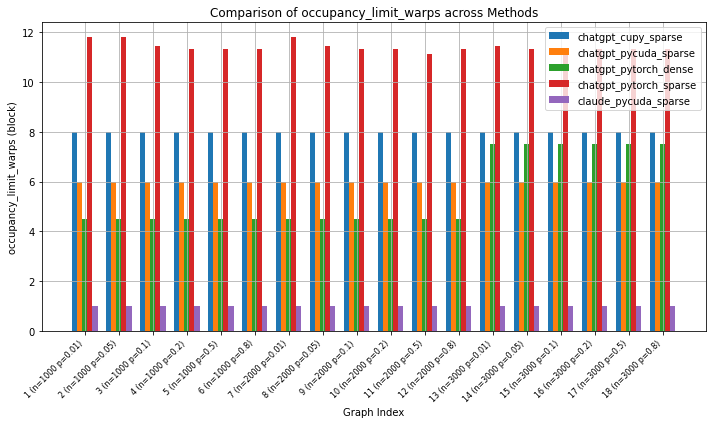

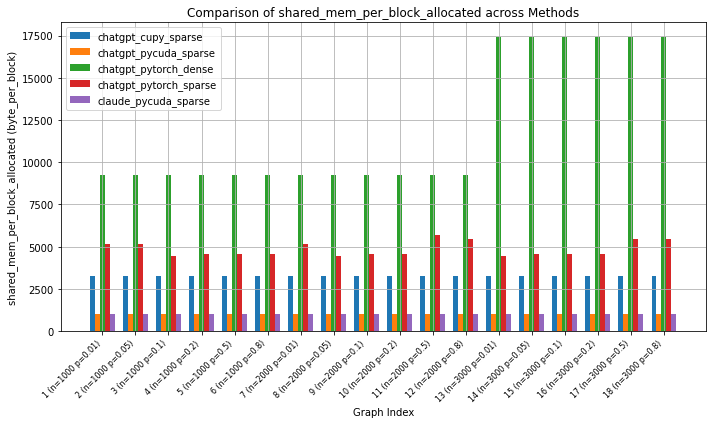

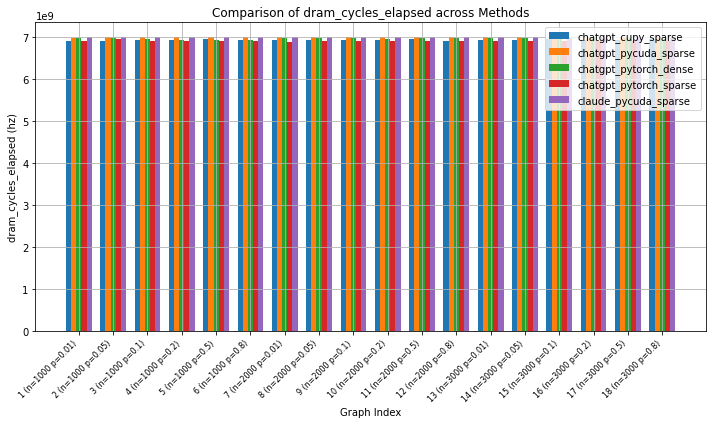

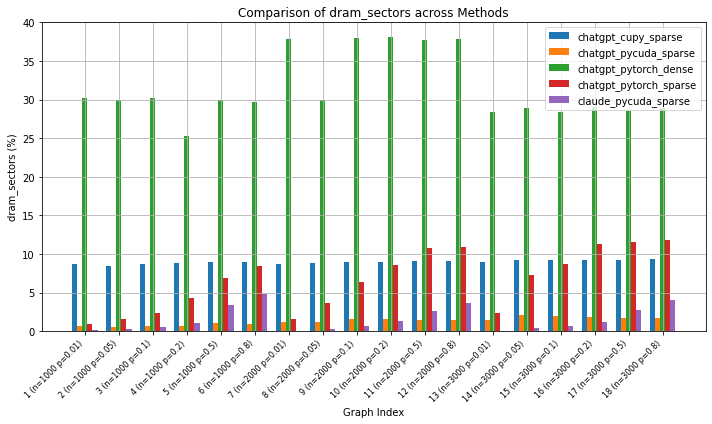

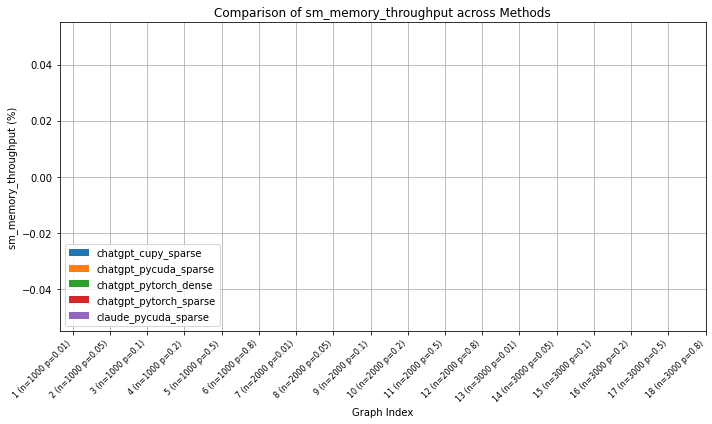

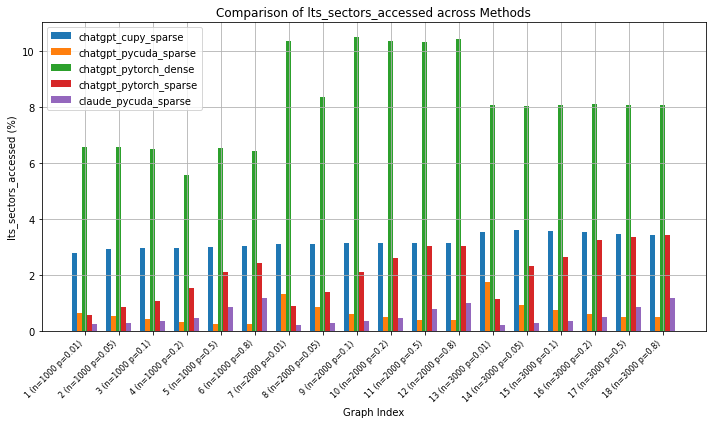

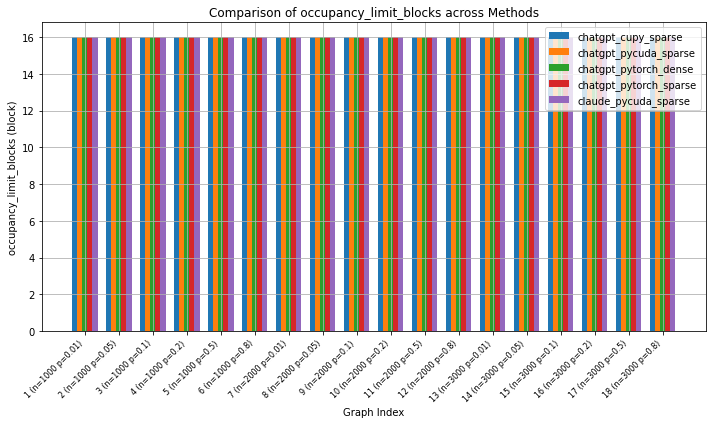

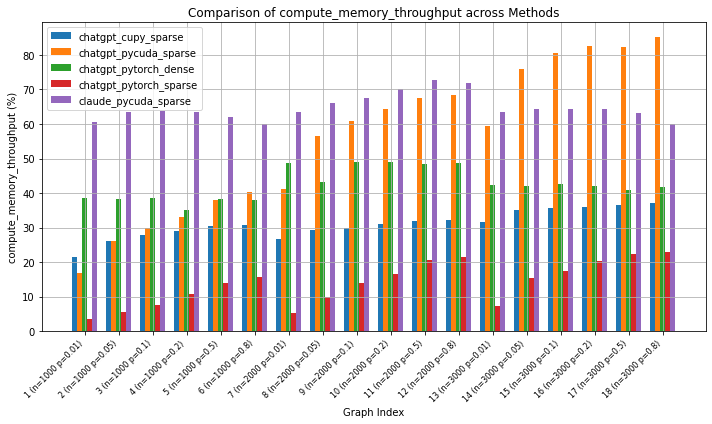

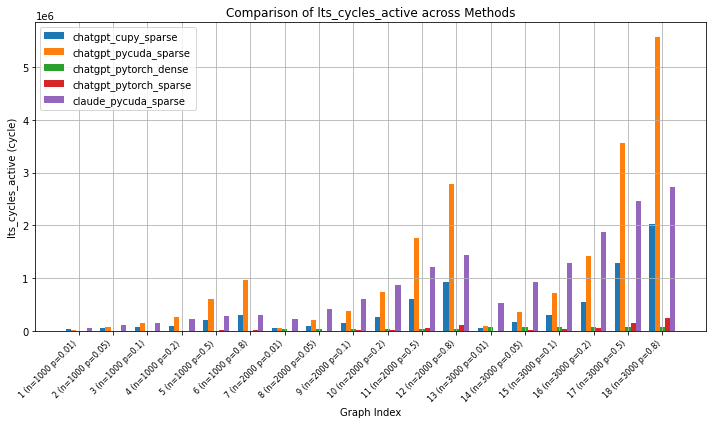

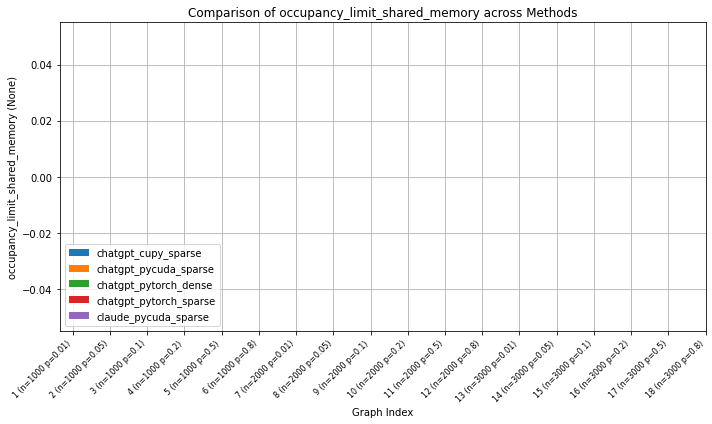

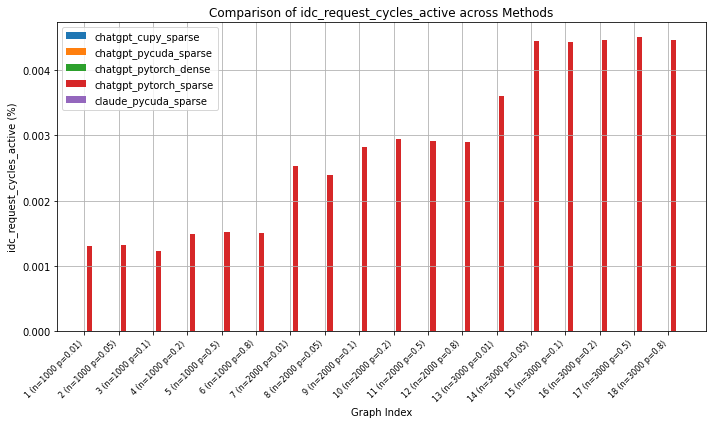

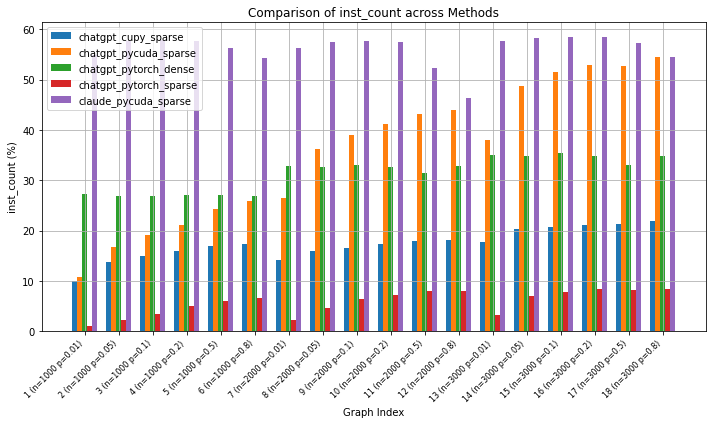

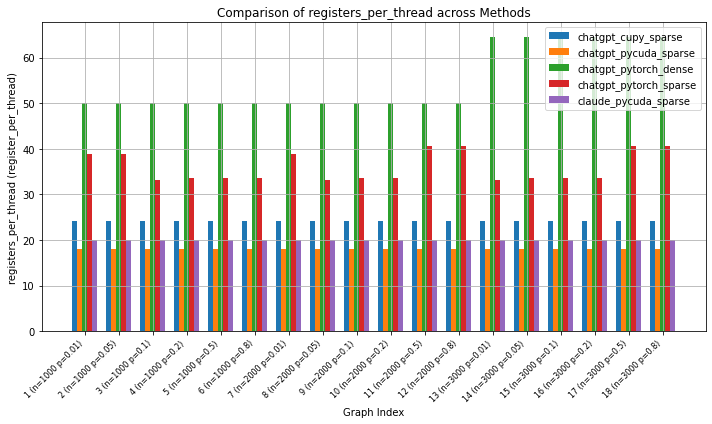

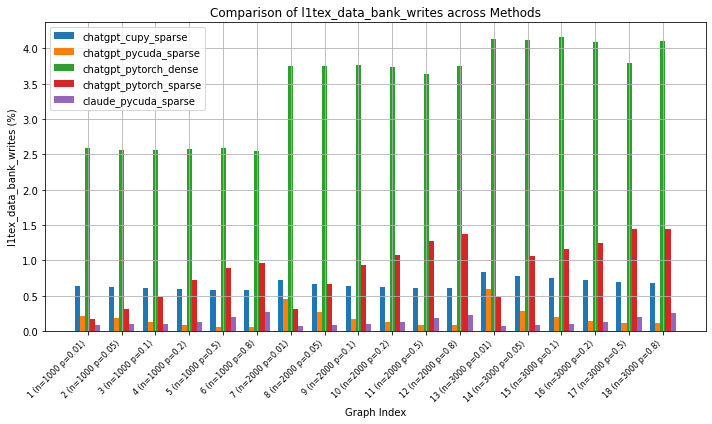

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

target_methods = [
    "chatgpt_pytorch_sparse",
    "chatgpt_pytorch_dense",
    "chatgpt_cupy_sparse",
    "claude_pycuda_sparse",
    "chatgpt_pycuda_sparse",
]


# Load JSON report data
def load_report(filename):
    with open(filename, "r") as f:
        data = json.load(f)
    return data


# Extract metric values for each method for a specific metric
def extract_metric_data(data, metric_name):
    unit = None
    metric_data = {}
    for method, graphs in data.items():
        if method in target_methods:
            for graph_index, graph_details in graphs.items():
                graph_index = int(graph_index)
                if graph_index not in metric_data:
                    metric_data[graph_index] = {}
                if method not in metric_data[graph_index]:
                    metric_data[graph_index][method] = {}

                # Ensure the metric exists in the current graph's metrics
                if "metrics" in graph_details and metric_name in graph_details["metrics"]:
                    metric_value = graph_details["metrics"][metric_name]["value"]
                    metric_data[graph_index][method] = metric_value
                    unit = graph_details["metrics"][metric_name]["unit"]
    return metric_data, unit


# Plot metric comparison as bar chart
def plot_metric_comparison(metric_name):
    metric_data, unit = extract_metric_data(data, metric_name)

    # include num_nodes and sparsity in the graph labels
    graph_indices = []
    for index in sorted(metric_data.keys()):
        if (
            index in graph_properties
            and graph_properties[index][2] is not None
            and graph_properties[index][3] is not None
        ):
            graph_indices.append(index)
            graph_labels = [
                f"{graph_index + 1} (n={graph_properties[graph_index][2]} p={str(graph_properties[graph_index][3])})"
                for graph_index in graph_indices
            ]
    methods = sorted(next(iter(metric_data.values())).keys())

    # Create bar width and offsets
    bar_width = 0.15
    x = np.arange(len(graph_indices))

    _, ax = plt.subplots(figsize=(10, 6))

    # Plot each method's bars
    for i, method in enumerate(methods):
        method_values = [metric_data[graph_index].get(method, np.nan) or np.nan for graph_index in graph_indices]
        ax.bar(x + i * bar_width, method_values, bar_width, label=method)

    ax.set_xticks(x + bar_width * (len(methods) - 1) / 2)
    ax.set_xticklabels(graph_labels, rotation=45, ha="right", fontsize=8)

    ax.set_xlabel("Graph Index")
    ax.set_ylabel(f"{metric_name} ({unit})")
    ax.set_title(f"Comparison of {metric_name} across Methods")

    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    # plt.savefig(Path("plots") / f"{metric_name}_comparison.jpg", format="jpg", dpi=300)
    plt.show()


metrics_names = {
    "time_duration",  # the duration of the kernel
    "compute_memory_throughput",  # compute memory pipeline throughput
    "dram_throughput",  # GPU DRAM throughput
    "dram_cycles_active",  # of cycles where DRAM was active
    "dram_cycles_elapsed",  # of elapsed DRAM clock cycles per second
    "dram_sectors",  # of of DRAM sectors accessed
    "lts_cycles_active",  # of cycles where LTS was active
    "lts_sectors_accessed",  # of LTS sectors accessed
    "lts_sectors_filled",  # of LTS sectors filled by device
    "gpc_cycles_elapsed",  # of elapsed GPC clock cycles per second
    "idc_request_cycles_active",  # of cycles where IDC processed requests from SM
    "l1tex_cycles_active",  # of cycles where L1TEX was active
    "l1tex_data_bank_reads",  # the number of data bank reads
    "l1tex_data_bank_writes",  # the number of data bank writes
    "sm_cycles_active",  # of cycles with at least one warp in flight
    "inst_count",  # of instructions executed
    "max_warps",  # the maximum number of warps per active cycle=
    "sm_memory_throughput",  # SM memory throughput
    "warps_active",  # the average number of active warps per active cycle
    "sm_throughput",  # the overall throughput of the SMs
    "sm_count",  # of SMs launched
    "thread_count",  # of threads launched
    "occupancy_limit_blocks",  # the occupancy limit in blocks
    "occupancy_limit_registers",  # the occupancy limit in registers
    "occupancy_limit_shared_memory",  # the occupancy limit in shared memory
    "occupancy_limit_warps",  # the occupancy limit in warps
    "occupancy_per_block_size",  # the occupancy per block size
    "occupancy_per_register_count",  # the occupancy per register count
    "occupancy_per_shared_mem_size",  # the occupancy per shared memory size
    "registers_per_thread",  # the number of registers per thread
    "registers_per_thread_allocated",  # the number of registers per thread allocated
    "shared_mem_per_block",  # the amount of shared memory per block
    "shared_mem_per_block_allocated",  # the amount of shared memory per block allocated
    "smsp_cycles_active",  # of cycles with at least one warp in flight on SMSP
    "smsp_max_warps",  # the maximum number of warps per active cycle on SMSP
}

data = load_report("gnn_results.json")
test_results = data[target_methods[0]]
graph_properties = {
    int(graph_index): (
        graph_data["graph_name"],
        graph_data["graph_type"],
        graph_data["num_nodes"],
        graph_data["sparsity"],
    )
    for graph_index, graph_data in test_results.items()
}

Path("plots").mkdir(exist_ok=True)
for metric in metrics_names:
    plot_metric_comparison(metric)